In [1]:
# import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import matplotlib.dates as mdate
from matplotlib import rcParams
# import io
# import zipfile
# from pathlib import Path
from site_function import Kuntouling_mingyang
from utils import save_data,save_figures
import matplotlib as mpl


In [2]:

mpl.font_manager.fontManager.addfont('字体/SIMSUN.ttf')
config = {
    "font.family":'serif',
    # "font.size": 20,
    "mathtext.fontset":'stix',
    "font.serif": ['SIMSUN'],
}
rcParams.update(config)
plt.rcParams['axes.unicode_minus'] = False



In [3]:
phase_name = '昆头岭明阳'
raw_data_path=None
pw_cur_path = None


In [4]:

site_dictionary = {'昆头岭明阳':Kuntouling_mingyang}
site_model = site_dictionary[phase_name]
if phase_name=='昆头岭明阳':
    wtg_pn = '风机'
    time_pn ='时间'
    type_pn = '风机类型'

    P_pn = '平均电网有功功率'
    w_pn = '平均风速'
    angle_pn='平均桨叶角度1a'
    cabin_north_angle = '平均机舱对北角度'
    wind_north_angle = '平均风向对北角度'
    generator_speed_pn = '平均发电机转速1'
def load_data(url):
    df = pd.read_csv(url)
    return df

In [5]:
if raw_data_path is not None:
    raw_data = load_data(raw_data_path)
else:
    raw_data = load_data('D:/1 新天\数字运营部 任务\昆头岭手动分析/24年1月/raw_data.csv')
theory_pw_cur = pd.read_excel(pw_cur_path if pw_cur_path else 'pw_theory_cur\昆头岭明阳理论功率曲线.xlsx')


In [6]:
site_instance = site_model(raw_data,theory_pw_cur)
site_instance.raw_data

,风机,风机类型,时间,低位机组总发电量,高位机组总发电量,高位机组净发电量,低位机组净发电量,平均机组理论有功功率,平均机组总可利用率,高位机组当天发电量,...,平均b相旁路电流,平均c相旁路电流,平均旁路频率,平均电池温度,平均a相输出功率因数,平均b相输出功率因数,平均c相输出功率因数,平均a相输出有功功率,平均b相输出有功功率,平均c相输出有功功率
0,#74,MySE5.0MW,2024-01-01 00:00:00,12085190,12085316,12698706,12698569,811.6644,0,150,...,0,0,0,0,0,0,0,0,0,0
1,#74,MySE5.0MW,2024-01-01 00:10:00,12085316,12085467,12698868,12698706,957.4250,0,312,...,0,0,0,0,0,0,0,0,0,0
2,#74,MySE5.0MW,2024-01-01 00:20:00,12085468,12085634,12699046,12698868,1051.2300,0,490,...,0,0,0,0,0,0,0,0,0,0
3,#74,MySE5.0MW,2024-01-01 00:30:00,12085634,12085763,12699185,12699046,821.1600,0,629,...,0,0,0,0,0,0,0,0,0,0
4,#74,MySE5.0MW,2024-01-01 00:40:00,12085763,12085867,12699300,12699185,675.7000,0,744,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71411,#89,MySE4.0MW,2024-01-31 23:10:00,7569846,7569862,7947820,7947803,147.4450,0,8326,...,0,0,0,0,0,0,0,0,0,0
71412,#89,MySE4.0MW,2024-01-31 23:20:00,7569862,7569885,7947843,7947820,190.7810,0,8349,...,0,0,0,0,0,0,0,0,0,0
71413,#89,MySE4.0MW,2024-01-31 23:30:00,7569885,7569905,7947863,7947843,170.9232,0,8369,...,0,0,0,0,0,0,0,0,0,0
71414,#89,MySE4.0MW,2024-01-31 23:40:00,7569905,7569915,7947874,7947863,116.0143,0,8380,...,0,0,0,0,0,0,0,0,0,0


2024-02-05 14:30:24.679 
  command:

    streamlit run d:\Anaconda\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


原始数据(71416, 235)
非限功率点：(64753, 243)
功率小于0点:(3466, 243)
正常发电点:(61287, 243)
原始数据、剔除限电后、剔除功率小于等于0后的数据大小分别为(71416, 64753, 61287)


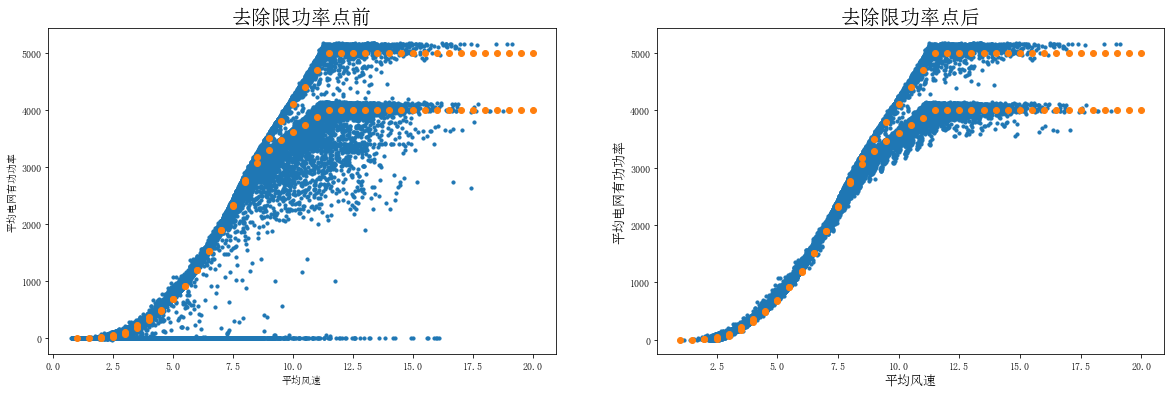

In [7]:
fig_limit_power,size_changing = site_instance.limit_power()
print(f'原始数据、剔除限电后、剔除功率小于等于0后的数据大小分别为{size_changing}')
fig_limit_power

In [8]:
torque_results_df,torque_fig_ls = site_instance.torque_speed_warning()

In [9]:
torque_results_df

,风机号,风机型号,斜率
0,#74,MySE5.0MW,1.892010
1,#81,MySE5.0MW,1.876204
2,#75,MySE4.0MW,0.019238
3,#76,MySE4.0MW,0.020169
4,#77,MySE4.0MW,0.019499
5,#78,MySE4.0MW,0.019372
6,#79,MySE4.0MW,0.019558
7,#80,MySE4.0MW,0.019725
8,#82,MySE4.0MW,0.019268
9,#83,MySE4.0MW,0.020007


In [10]:
yaw_result_df,yaw_angle_hist,yaw_result_list = site_instance.yaw_warning()
yaw_result_df

,风机号,风机型号,计数,K值最大夹角,频率最高夹角,差值,0°K值,最高K值,频率最高K值,最高-0
0,#74,MySE5.0MW,3621,-2.0,0.0,2.0,1.034265,1.043700,1.034265,0.009434
1,#81,MySE5.0MW,3805,-6.0,-2.0,4.0,1.035177,1.048723,1.028238,0.013546
2,#75,MySE4.0MW,3254,-7.0,1.0,8.0,1.002230,1.009759,1.007647,0.007529
3,#76,MySE4.0MW,3142,-7.0,-1.0,6.0,1.008809,1.010424,1.005642,0.001614
4,#77,MySE4.0MW,3686,-6.0,2.0,8.0,1.020986,1.027831,1.015213,0.006845
5,#78,MySE4.0MW,3510,-3.0,1.0,4.0,1.015481,1.024292,1.020533,0.008811
6,#79,MySE4.0MW,3491,4.0,1.0,3.0,1.015397,1.021608,1.013688,0.006210
7,#80,MySE4.0MW,3797,-3.0,0.0,3.0,1.016986,1.030760,1.016986,0.013774
8,#82,MySE4.0MW,3673,-3.0,0.0,3.0,1.021929,1.023720,1.021929,0.001791
9,#83,MySE4.0MW,3811,-6.0,-1.0,5.0,1.023982,1.038605,1.029893,0.014624


In [11]:
blade_result_df,fig_ls_blade,fig_ls_blade_time,fig_ls_blade_type = site_instance.blade_warning()
blade_result_df

,风机号,风机型号,桨叶角度最小值
0,#74,MySE5.0MW,-0.5
1,#81,MySE5.0MW,-0.5
2,#75,MySE4.0MW,-0.5
3,#76,MySE4.0MW,-0.5
4,#77,MySE4.0MW,-0.5
5,#78,MySE4.0MW,-0.5
6,#79,MySE4.0MW,-0.5
7,#80,MySE4.0MW,-0.5
8,#82,MySE4.0MW,-0.5
9,#83,MySE4.0MW,-0.5


In [12]:
site_instance.full_time()
all_data = site_instance.get_all_data()
site_instance.set_error_threshold()
site_instance.all_data

,风机,风机类型,时间,低位机组总发电量,高位机组总发电量,高位机组净发电量,低位机组净发电量,平均机组理论有功功率,平均机组总可利用率,高位机组当天发电量,...,平均发电机前轴承温升(发电机前轴承温度-舱内温度),平均发电机后轴承温升(发电机后轴承温度-舱内温度),平均齿轮箱主轴承温升(齿轮箱主轴承温度-舱内温度),平均齿轮箱油温温升(齿轮箱油温-舱内温度),平均发电机绕组温度1温升(发电机绕组温度1-舱内温度),平均发电机绕组温度2温升(发电机绕组温度2-舱内温度),平均发电机绕组温度3温升(发电机绕组温度3-舱内温度),平均发电机绕组温度4温升(发电机绕组温度4-舱内温度),平均发电机绕组温度5温升(发电机绕组温度5-舱内温度),平均发电机绕组温度6温升(发电机绕组温度6-舱内温度)
0,#74,MySE5.0MW,2024-01-01 00:00:00,12085190,12085316,12698706,12698569,811.6644,0,150,...,30.3482,30.1446,20.2526,29.3065,25.4606,26.6420,25.9008,26.5645,26.6258,27.1512
1,#74,MySE5.0MW,2024-01-01 00:10:00,12085316,12085467,12698868,12698706,957.4250,0,312,...,30.3434,30.0959,20.2882,29.5147,25.8318,27.0035,26.3288,26.9128,26.9300,27.4979
2,#74,MySE5.0MW,2024-01-01 00:20:00,12085468,12085634,12699046,12698868,1051.2300,0,490,...,30.4648,30.1717,20.3673,30.2245,26.7839,27.9595,27.2687,27.7894,27.8197,28.4618
3,#74,MySE5.0MW,2024-01-01 00:30:00,12085634,12085763,12699185,12699046,821.1600,0,629,...,30.6518,30.3490,20.6220,30.2863,26.9944,28.1568,27.4633,28.0098,28.0891,28.6414
4,#74,MySE5.0MW,2024-01-01 00:40:00,12085763,12085867,12699300,12699185,675.7000,0,744,...,30.6777,30.3860,20.7300,30.2537,26.3489,27.6456,26.9025,27.4323,27.4607,28.0951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4459,#89,MySE4.0MW,2024-01-31 23:10:00,7569846,7569862,7947820,7947803,147.4450,0,8326,...,47.0750,40.6255,33.7870,46.8970,18.3214,18.6675,16.7893,18.3055,17.8412,17.9104
4460,#89,MySE4.0MW,2024-01-31 23:20:00,7569862,7569885,7947843,7947820,190.7810,0,8349,...,47.8493,42.4392,35.6452,48.8230,19.4597,19.8832,18.0332,19.5102,19.0040,19.0706
4461,#89,MySE4.0MW,2024-01-31 23:30:00,7569885,7569905,7947863,7947843,170.9232,0,8369,...,49.1608,43.5476,36.5555,49.9488,20.6303,21.0410,19.1652,20.6713,20.1607,20.3006
4462,#89,MySE4.0MW,2024-01-31 23:40:00,7569905,7569915,7947874,7947863,116.0143,0,8380,...,48.9493,44.1758,37.1972,50.7795,20.5376,21.0629,19.1970,20.6523,20.1947,20.1883


In [13]:
site_instance.scene_df

,scene_name,abnormal_thre,warning_thre,error_thre,abnormal_thre_k
0,平均齿轮箱前轴承温度,70,None,80,80
1,平均齿轮箱后轴承温度,70,None,80,90
2,平均发电机前轴承温度,85,None,95,95
3,平均发电机后轴承温度,85,None,95,95
4,平均齿轮箱主轴承温度,60,None,70,70
5,平均齿轮箱油温,60,None,70,70
6,平均发电机绕组温度1,135,None,145,140
7,平均发电机绕组温度2,135,None,145,140
8,平均发电机绕组温度3,135,None,145,140
9,平均发电机绕组温度4,135,None,145,140


In [14]:
if_n=True
Large_components_fig = site_instance.gen_Large_components_temp(if_notation=if_n)

自动标注,数据最大值为：65.4，异常阈值：70
自动标注,数据最大值为：73.17，异常阈值：80
自动标注,数据最大值为：66.7992，异常阈值：70
自动标注,数据最大值为：75.4368，异常阈值：90
自动标注,数据最大值为：78.5812，异常阈值：85
自动标注,数据最大值为：83.387，异常阈值：95
自动标注,数据最大值为：74.956，异常阈值：85
自动标注,数据最大值为：76.4573，异常阈值：95
自动标注,数据最大值为：43.0488，异常阈值：60
自动标注,数据最大值为：50.69499999999999，异常阈值：70
自动标注,数据最大值为：66.81，异常阈值：60
有异常数据
自动标注,数据最大值为：75.7393，异常阈值：70
有异常数据
自动标注,数据最大值为：128.0374，异常阈值：135
自动标注,数据最大值为：123.0637，异常阈值：140
自动标注,数据最大值为：127.0246，异常阈值：135
自动标注,数据最大值为：122.0216，异常阈值：140
自动标注,数据最大值为：125.0069，异常阈值：135
自动标注,数据最大值为：119.6306，异常阈值：140
自动标注,数据最大值为：126.2612，异常阈值：135
自动标注,数据最大值为：121.5108，异常阈值：140
自动标注,数据最大值为：124.5976，异常阈值：135
自动标注,数据最大值为：119.0893，异常阈值：140
自动标注,数据最大值为：132.3799，异常阈值：135
自动标注,数据最大值为：127.3848，异常阈值：140


In [15]:
generator_temp_fig = site_instance.gen_generator_Temp()
pitch_motor_temp_fig = site_instance.gen_pitch_motor_Temp()

In [50]:
import pandas as pd
from docx import Document 
from docx.shared import Cm
import math
import io
from docx.oxml.ns import qn

class gen_document():
    def __init__(self,
                 instance,
                #  Large_components_temp_ls,
                #  generator_temp_ls,
                #  pitch_motor_temp_ls,
                 Large_component_fig_ls,
                 generator_temp_fig_ls,
                 pitch_motor_temp_fig_ls,
                 torque_fig_ls,
                 yaw_data,
                 blade_pw_fig_ls,
                 blade_time_fig_ls,
                 ):
        self.Large_components_temp_ls = instance.Large_components_temp_ls
        self.Large_components_temp_ls = instance.Large_components_temp_ls
        self.generator_temp_ls = instance.generator_temp_ls
        self.pitch_motor_temp_ls = instance.pitch_motor_temp_ls
        self.Large_component_fig_ls = Large_component_fig_ls
        self.generator_temp_fig_ls = generator_temp_fig_ls
        self.pitch_motor_temp_fig_ls = pitch_motor_temp_fig_ls
        self.torque_fig_ls = torque_fig_ls
        self.yaw_data = yaw_data
        self.blade_pw_fig_ls = blade_pw_fig_ls
        self.blade_time_fig_ls = blade_time_fig_ls
        self.instance = instance
        self.document = Document()
        self.document.styles['Normal'].font.name = 'Times New Roman'
        self.document.styles['Normal']._element.rPr.rFonts.set(qn('w:eastAsia'), u'宋体')
        self.gen_docx()
    
    def gen_docx(self):
        # print(1)
        self.document.add_heading('大部件温度异常',level=2)
        if len(self.Large_component_fig_ls)>0:
            self.gen_Large_component_paragraph()
        # print(1)
        self.document.add_heading('发电机绕组温度异常的风机',level=2)
        if len(self.generator_temp_fig_ls)>0:
            self.gen_all_wtg_paragraph(self.generator_temp_fig_ls)
        else: 
            self.document.add_paragraph('发电机绕组温度同风机不同相对比无异常')
        # print(1)
        self.document.add_heading('变桨电机温度异常的风机',level=2)
        if len(self.pitch_motor_temp_fig_ls)>0:
            self.gen_all_wtg_paragraph(self.pitch_motor_temp_fig_ls)
        else: 
            self.document.add_paragraph('变桨电机温度同风机不同相对比无异常')
        # print(1)
        self.document.add_heading('偏航对风',level=2)
        if self.yaw_data is not None:
            self.gen_table_paragraph(self.yaw_data)
        # print(1)
        self.document.add_heading('转矩控制',level=2)
        if len(self.torque_fig_ls)>0:
            self.gen_all_wtg_paragraph(self.torque_fig_ls)
        # print(1)
        self.document.add_heading('桨叶角度对零',level=2)
        if len(self.blade_pw_fig_ls)>0:
            self.gen_all_wtg_paragraph(self.blade_pw_fig_ls)
        if len(self.blade_time_fig_ls)>0:
            self.gen_all_wtg_paragraph(self.blade_time_fig_ls)
        
        return self.document
    
    def gen_all_wtg_paragraph(self,figure_list):
        row = math.ceil(len(figure_list)/4)
        table = self.document.add_table(rows=row,cols=4)
        for i,cell in enumerate(table._cells):
            if i<len(figure_list):
                run = cell.add_paragraph().add_run()
                buf = io.BytesIO()
                figure_list[i].savefig(buf,dpi=500,facecolor='white',format='jpg')
                run.add_picture(buf,height=Cm(3.2))
                buf.close()
            else:
                break

    def gen_Large_component_paragraph(self):
        scene_list = self.instance.Large_components_temp_ls + self.instance.generator_temp_ls
        for i,scene in enumerate(scene_list):
            self.document.add_heading(f'{i+1}、{scene}',level=3)
            table = self.document.add_table(rows=1,cols=2)
            for j,cell in enumerate(table._cells):
                run = cell.add_paragraph().add_run()
                # run.add_picture(self.Large_component_fig_ls[i*2+j],height=Cm(5.5))
                buf = io.BytesIO()
                self.Large_component_fig_ls[i*2+j].savefig(buf,dpi=500,facecolor='white',format='jpg')
                run.add_picture(buf,height=Cm(5.5))
                buf.close()
    
    def gen_table_paragraph(self,dataframe):
        table = self.document.add_table(rows=1,cols=dataframe.shape[1])
        table.sytle = 'Table Grid'
        head_cells = table.rows[0].cells
        for i,col in enumerate(dataframe.columns):
            head_cells[i].text = col
        
        for _,row in dataframe.iterrows():
            row_cells = table.add_row().cells
            # print(row)
            for j in range(len(row)):
                # print(j,list(row))
                row_cells[j].text = str(list(row)[j])
            


In [51]:

word = gen_document(site_instance,
             Large_components_fig,
             generator_temp_fig,
             pitch_motor_temp_fig,
             torque_fig_ls,
             yaw_result_df,
             fig_ls_blade,
             fig_ls_blade_time
             )

In [52]:
word.document.save('数据异常部分报告.docx')